# NYC Airbnb Visual Analysis

## Contents
### 1. Import Libraries
### 2. Import Dataset
### 3. Exploring Visual Relationships
### 4. Exploring Key Variables
### 5. Correlations
### 6. Scatterplots
### 7. Pair Plots
### 8. Categorical Plots
### 9. Hypothesis Exploration

### 1. Import Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import seaborn as sns
import scipy

### 2. Import Dataset

In [2]:
#set path
path = r'/Users/shelbysteele/Documents/Airbnb NYC Rental Analysis'

In [3]:
#import data
df = pd.read_csv(r'/Users/shelbysteele/Documents/Airbnb NYC Rental Analysis/02 Data/Prepared Data/NYC_cleaned_data_3.csv', index_col = False)

### 3. Exploring Visual Relationships

In [4]:
df.head()

Unnamed: 0  listing host_identity_verified    borough        neighborhood  \
0           0        0            unconfirmed   Brooklyn          Kensington   
1           1        1               verified  Manhattan             Midtown   
2           2        2               verified  Manhattan         East Harlem   
3           3        3               verified  Manhattan         Murray Hill   
4           4        4            unconfirmed   Brooklyn  Bedford-Stuyvesant   

   latitude  longitude  instant_bookable cancellation_policy        room_type  \
0  40.64749  -73.97237             False              strict     Private room   
1  40.75362  -73.98377             False            moderate  Entire home/apt   
2  40.79851  -73.94399             False            moderate  Entire home/apt   
3  40.74767  -73.97500              True            flexible  Entire home/apt   
4  40.68688  -73.95596             False            moderate     Private room   

   ...  service_fee  minimum_nights  number_of_reviews  last_review  \
0  ...          193              10                  9     10/19/21   
1  ...           28              30                 45      5/21/22   
2  ...           41              10                  9     11/19/18   
3  ...          115               3                 74      6/22/19   
4  ...          212              45                 49      10/5/17   

   reviews_per_month review_rate_number  listings_per_host  days_booked  \
0               0.21                  4                  6          286   
1               0.38                  4                  2          228   
2               0.10                  3                  1          289   
3               0.59                  3                  1          365   
4               0.40                  5                  1          219   

   fee_category  revenue  
0      High Fee   276276  
1       Low Fee    32376  
2       Low Fee    58956  
3    Medium Fee   210605  
4      High Fee   232140  

[5 rows x 22 columns]

In [5]:
#drop columns for Unnamed: 0 since it's not appliable to the analysis
df.drop(columns = {'Unnamed: 0'}, inplace = True)

In [9]:
#creating revenue category
df['revenue'] = df['price'] * df['days_booked']
df['revenue'] = df['revenue'].astype(int)

In [10]:
#checking it was executed
df.head()

listing host_identity_verified    borough        neighborhood  latitude  \
0        0            unconfirmed   Brooklyn          Kensington  40.64749   
1        1               verified  Manhattan             Midtown  40.75362   
2        2               verified  Manhattan         East Harlem  40.79851   
3        3               verified  Manhattan         Murray Hill  40.74767   
4        4            unconfirmed   Brooklyn  Bedford-Stuyvesant  40.68688   

   longitude  instant_bookable cancellation_policy        room_type  \
0  -73.97237             False              strict     Private room   
1  -73.98377             False            moderate  Entire home/apt   
2  -73.94399             False            moderate  Entire home/apt   
3  -73.97500              True            flexible  Entire home/apt   
4  -73.95596             False            moderate     Private room   

   construction_year  ...  service_fee  minimum_nights  number_of_reviews  \
0               2020  ...          193              10                  9   
1               2007  ...           28              30                 45   
2               2009  ...           41              10                  9   
3               2013  ...          115               3                 74   
4               2009  ...          212              45                 49   

   last_review reviews_per_month  review_rate_number  listings_per_host  \
0     10/19/21              0.21                   4                  6   
1      5/21/22              0.38                   4                  2   
2     11/19/18              0.10                   3                  1   
3      6/22/19              0.59                   3                  1   
4      10/5/17              0.40                   5                  1   

   days_booked  fee_category revenue  
0          286      High Fee  276276  
1          228       Low Fee   32376  
2          289       Low Fee   58956  
3          365    Medium Fee  210605  
4          219      High Fee  232140  

[5 rows x 21 columns]

### 4. Exploring Key Variables

In [12]:
#Where in New York City can you expect the most revenue out of your Airbnb 
listings_per_neighbourhood_group = df.groupby('borough')['borough'].count()

fig = px.bar(listings_per_neighbourhood_group,
            x=listings_per_neighbourhood_group.index,
            y=listings_per_neighbourhood_group.values,
            labels={'x': 'Borough', 'y': 'Number of listings'},
            text=[(i) for i in listings_per_neighbourhood_group.values],
            title='Number of Listings by Borough',
            color_discrete_sequence=px.colors.sequential.Agsunset,
)

fig.update_layout(font=dict(size=15, color='black', family='Avenir'))

fig.show()

There are more listings in Brooklyn and Manhattan meaning pricings can be increased due to higher demand. 

In [13]:
#How many bookings per year does the average place have according to the neighborhood ?
availability_per_borough = df.groupby('borough')['Days booked'].mean()

fig = px.bar(availability_per_borough,
            x=availability_per_borough.index,
            y=availability_per_borough.values,
            labels={'x': 'Borough', 'y': 'Average Availability'},
            text=[str(round(i)) for i in availability_per_borough.values],
            title='Average Availability by Borough',
            color_discrete_sequence=px.colors.sequential.deep,
)

fig.update_layout(font=dict(size=20, color='black', family='Avenir'))

fig.show()

Brooklyn and Manhattan have the least availability on average per year. 

In [14]:
# What are the ratio of verified hosts?
verified_hosts = df['host_identity_verified'].value_counts()

fig = px.pie(verified_hosts,
            values=verified_hosts.values,
            names=['Unverified', 'Verified'],
            title='Ratio of verified hosts',
)

fig.update_layout(font=dict(size=20, color='black', family='Avenir'))

fig.show()

In [15]:
# What are the ratio of cancellation polices?
instant_bookable = df['instant_bookable'].value_counts()

fig = px.pie(instant_bookable,
            values=instant_bookable.values,
            names=['True', 'False'],
            title='Ratio of Instant bookable',
)

fig.update_layout(font=dict(size=20, color='black', family='Avenir'))

fig.show()

Looks like verified host do not allow instant bookings, where unverified hosts do allow instant bookings

In [16]:
# What are the average price for each room type?
price_per_room_type = df.groupby('room_type')['price'].count()

fig = px.bar(price_per_room_type,
            x=price_per_room_type.index,
            y=price_per_room_type.values,
            labels={'x': 'Room type', 'y': 'Count'},
            text=[str(int(i)) for i in price_per_room_type.values],
            title='Price by Room Type',
            color_discrete_sequence=px.colors.sequential.Bluyl,
)

fig.update_layout(font=dict(size=16, color='black', family='Avenir'))

fig.show()

More private airbnb rentals equates to higher prices

Text(0, 0.5, 'Service fee')

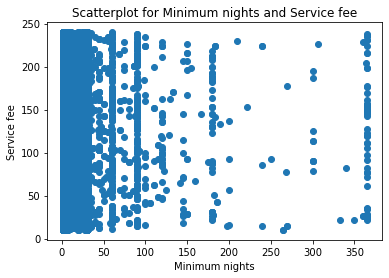

In [17]:
#How does the minimum stay affect the service fee ?
plt.scatter(x=df['minimum_nights'], y=df['service_fee'])

plt.title('Scatterplot for Minimum nights and Service fee')
plt.xlabel('Minimum nights')
plt.ylabel('Service fee')

Hard to determine a correlation between, will need to be investigated further

In [18]:
# What is the average number of listings per host?
review_rate_per_neighbourhood_group = df.groupby('borough')['listings_per_host'].mean()

fig = px.bar(review_rate_per_neighbourhood_group,
            x=review_rate_per_neighbourhood_group.index,
            y=review_rate_per_neighbourhood_group.values,
            labels={'x': 'Borough', 'y': 'Number of Listings Per Host'},
            text=[str(round(i, 2)) for i in review_rate_per_neighbourhood_group.values],
            title='Number of Listings Per Host',
            color_discrete_sequence=px.colors.sequential.algae,
)

fig.update_layout(font=dict(size=20, color='black'))

fig.show()

Most host who own multiple rentals have them in Manhattan

In [19]:
#Does the ability to instantly book affect the price ?
instant_booking_by_price = df.groupby('instant_bookable')['price'].mean()

fig = px.bar(instant_booking_by_price,
            x=instant_booking_by_price.index,
            y=instant_booking_by_price.values,
            labels={'x': 'instant booking', 'y': 'Average Price'},
            text=['$' + str(int(i)) for i in instant_booking_by_price.values],
            title='Average Pricing when compared to instant booking',
            color_discrete_sequence=px.colors.sequential.Bluyl,
)

fig.update_layout(font=dict(size=16, color='black'))

fig.show()

Average prices doesnt have an affect on instant booking. 

In [20]:
#What are the top 10 highest revenue neighborhoods 
top_revenue_neighborhoods = df.groupby('neighborhood')['revenue'].sum()

fig = px.bar(top_revenue_neighborhoods, 
            x=top_revenue_neighborhoods.index, 
            y=top_revenue_neighborhoods.values, 
            labels={'x': 'neighborhood', 'y': 'price'},
            text=[str(i) for i in top_revenue_neighborhoods.values],
            title='Top Revenue Neighborhoods',
)

fig.update_layout(font=dict(size=15, color='black', family='Avenir'))

fig.show()

The top 10 neighborhoods are: Bedford-Stuyvesant, Williamsburg, Harlem, Hells Kitchen, Bushwick, Upper East Side, Upper West Side, Midtown, Crown Heights, East Village, East Harlem

In [21]:
# How many new builds are there for each year?
constructions_per_year = df.groupby('construction_year')['construction_year'].count()

fig = px.bar(constructions_per_year, 
            x=constructions_per_year.index, 
            y=constructions_per_year.values, 
            labels={'x': 'Construction year', 'y': 'Number of constructions'},
            text=[str(i) for i in constructions_per_year.values],
            title='Number of constructions per year',
)

fig.update_layout(font=dict(size=20, color='black', family='Avenir'))

fig.show()

The number of new builds is consistant year over year. 

In [22]:
# Do average prices get higher with newer construction?
price_per_year = df.groupby('construction_year')['price'].median()

fig = px.line(price_per_year,
            x=price_per_year.index,
            y=price_per_year.values,
            labels={'x': 'Construction year', 'y': 'Average price'},
            text=['$' + str(int(i)) for i in price_per_year.values],
            title='Average Rental Price per Year',
            color_discrete_sequence=px.colors.sequential.Teal_r,
)

fig.update_layout(font=dict(size=16, color='black', family='Avenir'))

fig.show()

### 5. Correlations

In [11]:
#creating a correlation matrix using pandas
df.corr()

listing  latitude  longitude  instant_bookable  \
listing             1.000000 -0.007703   0.039203          0.005451   
latitude           -0.007703  1.000000   0.072303          0.000257   
longitude           0.039203  0.072303   1.000000         -0.004934   
instant_bookable    0.005451  0.000257  -0.004934          1.000000   
construction_year  -0.000807  0.006896   0.000145          0.001550   
price               0.006434 -0.005600   0.002335         -0.000263   
service_fee         0.006601 -0.005371   0.001980         -0.000175   
minimum_nights      0.025112  0.033957  -0.057533         -0.003749   
number_of_reviews  -0.052084 -0.022110   0.064651          0.000522   
reviews_per_month   0.033571 -0.020937   0.118539          0.002299   
review_rate_number  0.040390 -0.005204   0.015313          0.002649   
listings_per_host   0.033869  0.027645  -0.091484          0.001714   
days_booked        -0.125982 -0.014352   0.077025         -0.004504   
revenue            -0.096295 -0.014292   0.062006         -0.005512   

                    construction_year     price  service_fee  minimum_nights  \
listing                     -0.000807  0.006434     0.006601        0.025112   
latitude                     0.006896 -0.005600    -0.005371        0.033957   
longitude                    0.000145  0.002335     0.001980       -0.057533   
instant_bookable             0.001550 -0.000263    -0.000175       -0.003749   
construction_year            1.000000 -0.004341    -0.004282        0.001260   
price                       -0.004341  1.000000     0.999510       -0.005323   
service_fee                 -0.004282  0.999510     1.000000       -0.005502   
minimum_nights               0.001260 -0.005323    -0.005502        1.000000   
number_of_reviews            0.002915  0.003690     0.004267       -0.079060   
reviews_per_month            0.004994  0.003803     0.004233       -0.165416   
review_rate_number           0.006237 -0.007247    -0.007162        0.000799   
listings_per_host           -0.002357  0.000738     0.001085        0.121994   
days_booked                 -0.006556 -0.000626    -0.000042        0.079218   
revenue                     -0.004260  0.450761     0.450864        0.059368   

                    number_of_reviews  reviews_per_month  review_rate_number  \
listing                     -0.052084           0.033571            0.040390   
latitude                    -0.022110          -0.020937           -0.005204   
longitude                    0.064651           0.118539            0.015313   
instant_bookable             0.000522           0.002299            0.002649   
construction_year            0.002915           0.004994            0.006237   
price                        0.003690           0.003803           -0.007247   
service_fee                  0.004267           0.004233           -0.007162   
minimum_nights              -0.079060          -0.165416            0.000799   
number_of_reviews            1.000000           0.590248           -0.018871   
reviews_per_month            0.590248           1.000000            0.038396   
review_rate_number          -0.018871           0.038396            1.000000   
listings_per_host           -0.080167          -0.026163            0.023613   
days_booked                  0.105861           0.079169           -0.011378   
revenue                      0.087626           0.066486           -0.013165   

                    listings_per_host  days_booked   revenue  
listing                      0.033869    -0.125982 -0.096295  
latitude                     0.027645    -0.014352 -0.014292  
longitude                   -0.091484     0.077025  0.062006  
instant_bookable             0.001714    -0.004504 -0.005512  
construction_year           -0.002357    -0.006556 -0.004260  
price                        0.000738    -0.000626  0.450761  
service_fee                  0.001085    -0.000042  0.450864  
minimum_nights               0.121994     0.07921

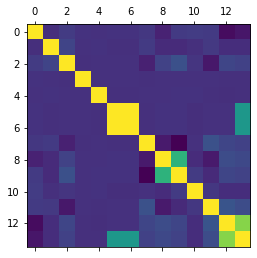

In [12]:
#create correlation heatmap using matplotlib
plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

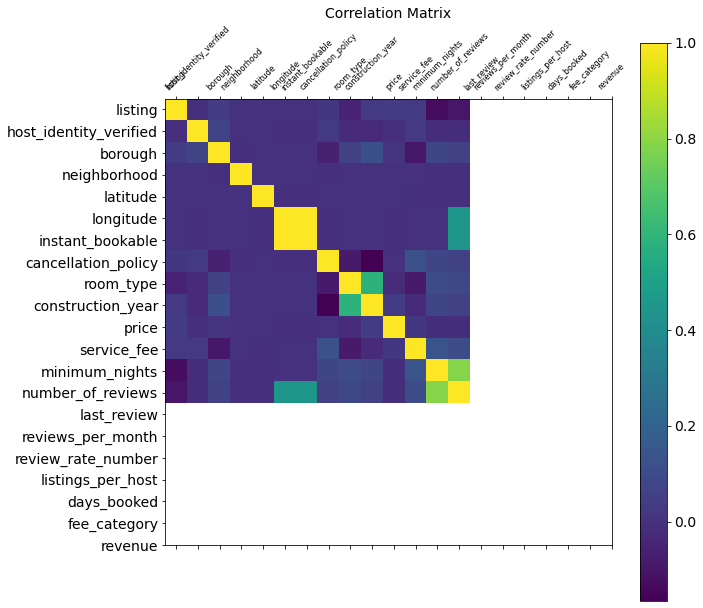

In [13]:
#add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(10, 10)) # figure size
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

###### Looking at the correlation above, it apprears most variables dont have a strong relationship with other variables. However, there is a strong correlation (+1) between price of airbnb and serivce fee, as well as reviews received per months and total reviews (+.59), and price with revenue (+.45)

#### Creating correlations heatmap in seaborn

In [14]:
#checking columns for subgroup
df.columns

Index(['listing', 'host_identity_verified', 'borough', 'neighborhood',
       'latitude', 'longitude', 'instant_bookable', 'cancellation_policy',
       'room_type', 'construction_year', 'price', 'service_fee',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number', 'listings_per_host',
       'days_booked', 'fee_category', 'revenue'],
      dtype='object')

In [16]:
#create subset excluding the lat/long columns
sub=df[['listing', 'host_identity_verified', 'borough', 'neighborhood', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'listings_per_host', 'days_booked', 'revenue']]

In [17]:
#checking it was executed
sub

listing host_identity_verified    borough        neighborhood  \
0            0            unconfirmed   Brooklyn          Kensington   
1            1               verified  Manhattan             Midtown   
2            2               verified  Manhattan         East Harlem   
3            3               verified  Manhattan         Murray Hill   
4            4            unconfirmed   Brooklyn  Bedford-Stuyvesant   
...        ...                    ...        ...                 ...   
81558    81558               verified   Brooklyn        Williamsburg   
81559    81559            unconfirmed     Queens             Bayside   
81560    81560               verified     Queens       East Elmhurst   
81561    81561               verified     Queens            Edgemere   
81562    81562               verified  Manhattan                SoHo   

       instant_bookable cancellation_policy        room_type  \
0                 False              strict     Private room   
1                 False            moderate  Entire home/apt   
2                 False            moderate  Entire home/apt   
3                  True            flexible  Entire home/apt   
4                 False            moderate     Private room   
...                 ...                 ...              ...   
81558              True            flexible     Private room   
81559             False            moderate     Private room   
81560              True              strict     Private room   
81561              True            moderate     Private room   
81562             False            flexible  Entire home/apt   

       construction_year  price  service_fee  minimum_nights  \
0                   2020    966          193              10   
1                   2007    142           28              30   
2                   2009    204           41              10   
3                   2013    577          115               3   
4                   2009   1060          212              45   
...                  ...    ...          ...             ...   
81558               2020   1078          216               1   
81559               2007    103           21               7   
81560               2022    982          196               1   
81561               2020    946          189               1   
81562               2020   1043          209               2   

       number_of_reviews last_review  reviews_per_month  review_rate_number  \
0                      9    10/19/21               0.21                   4   
1                     45     5/21/22               0.38                   4   
2                      9    11/19/18               0.10                   3   
3                     74     6/22/19               0.59                   3   
4                     49     10/5/17               0.40                   5   
...                  ...         ...                ...                 ...   
81558                 58     6/10/19               2.08                   5   
81559                 40     6/23/19               1.51                   1   
81560                239     6/29/19               8.58                   2   
81561                 76     6/27/19               2.84                   1   
81562                 21      7/1/19               0.74                   4   

       listings_per_host  days_booked  revenue  
0                      6          286   276276  
1                      2          228    32376  
2                      1          289    58956  
3                      1          365   210605  
4                      1          219   232140  
...                  ...          ...      ...  
81558                  2          120   129360  
81559                  5          148    15244  
81560                  2          361   354502  
81561                  1          324   306504  
81562                  2          343   357749  

[81563 rows x 18 columns]

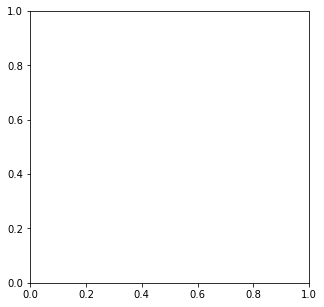

In [18]:
#creating a subplot with matplotlib
f,ax = plt.subplots(figsize =(5,5))

In [19]:
#creating a correlation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

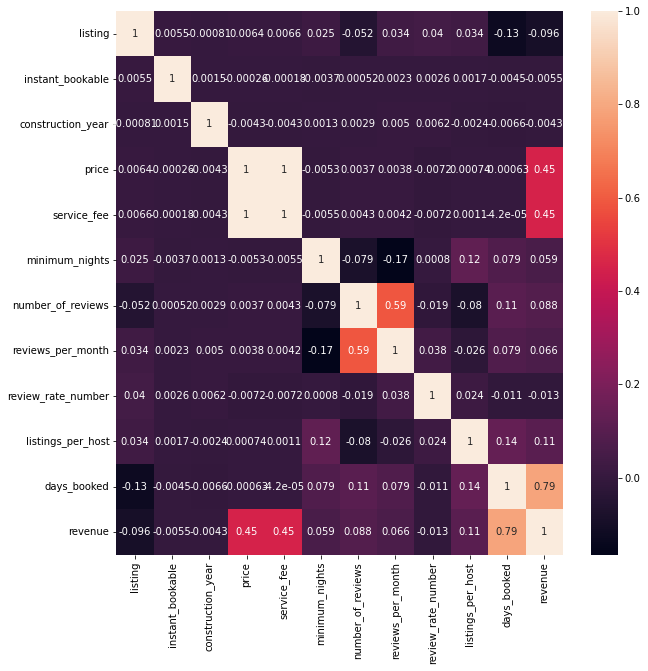

In [20]:
#putting it all together
f,ax = plt.subplots(figsize =(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

###### Looking at the correlation above, it apprears most variables dont have a strong relationship with other variables. However, there is a strong correlation (+1) between price of airbnb and serivce fee, as well as reviews received per months and total reviews (+.59), and price with revenue (+.45)

### 6. Scatterplots

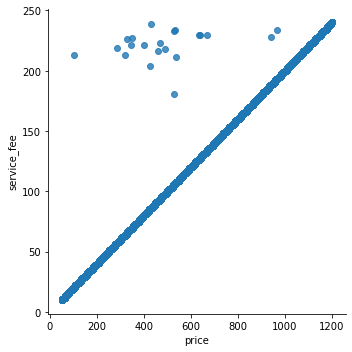

In [21]:
#creating a scatterplot with 'price' and 'service fee'
sns.lmplot(x = 'price', y = 'service_fee', data = df)

There is a strong positive relationship (1) between the price of the rental and the service fee. 

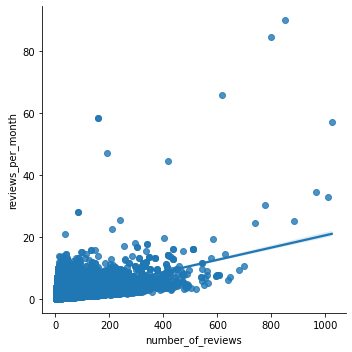

In [22]:
#creating a scatterplot with 'reviews per month' and 'number of reviews'
sns.lmplot(x = 'number_of_reviews', y = 'reviews_per_month', data = df)

Theres a strong positive relationship (.57) between the number of reviews and reviews per month.
As renters leave reviews each momth, the total number of reviews also increases

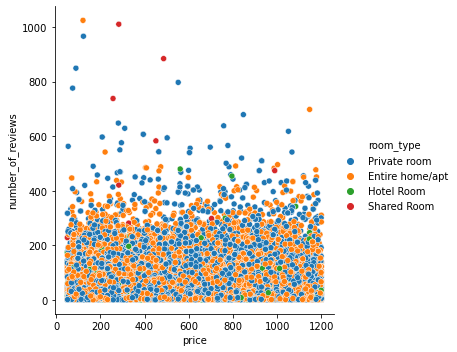

In [23]:
#scatterplot
sns.relplot(data=df, kind='scatter', x='price', y='number_of_reviews', hue='room_type');

### 7. Pair Plots

In [24]:
#viewing colummns for pair plots
df.columns

Index(['listing', 'host_identity_verified', 'borough', 'neighborhood',
       'latitude', 'longitude', 'instant_bookable', 'cancellation_policy',
       'room_type', 'construction_year', 'price', 'service_fee',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number', 'listings_per_host',
       'days_booked', 'fee_category', 'revenue'],
      dtype='object')

In [25]:
#creating subgroup for pair plots
sub2=sub[['listing', 'borough', 'neighborhood', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'listings_per_host', 'days_booked', 'revenue']]

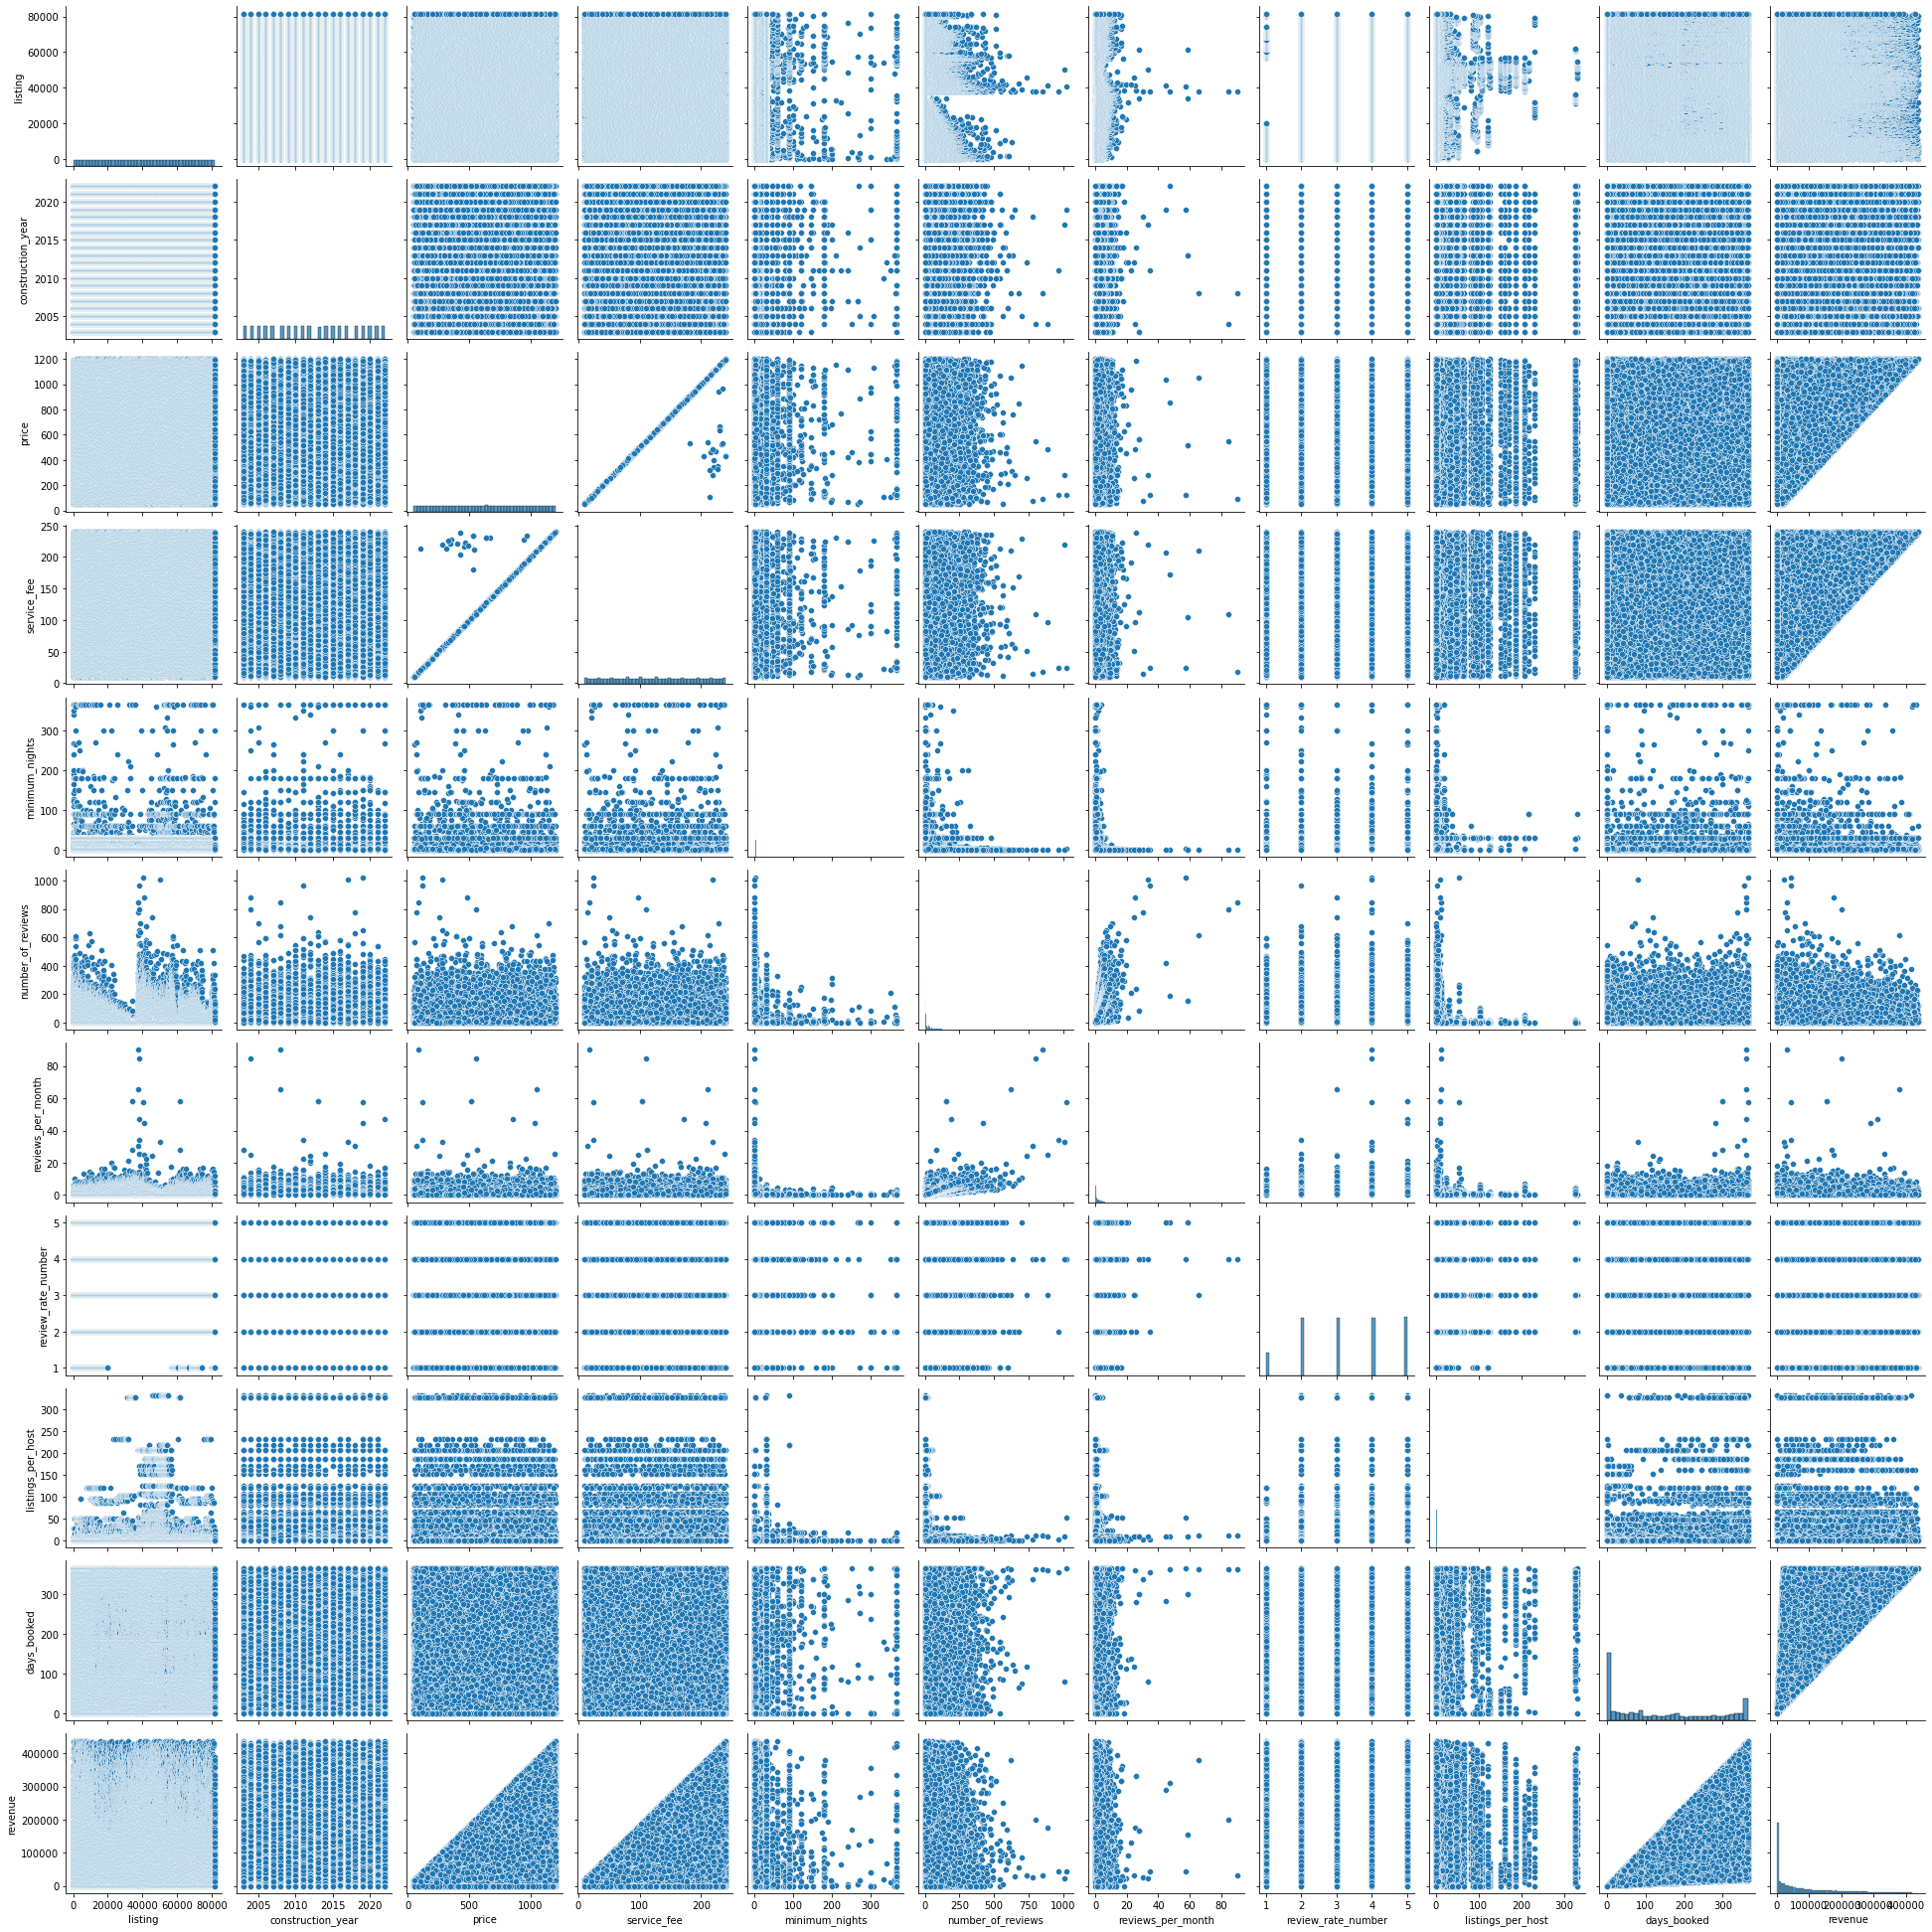

In [26]:
#create a pair plot
g = sns.pairplot(sub2)

A further investigation of listings_per_host when compared with minimum nights, number of reviews, and reviews per month would be interesting to look more into. 

### 8. Categorical Plots

<AxesSubplot:xlabel='price', ylabel='Count'>

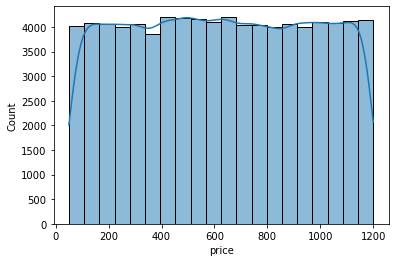

In [27]:
#Creating a categorical variable that splits the 'price' colum into categories
sns.histplot(df['price'], bins = 20, kde = True)

<AxesSubplot:xlabel='service_fee', ylabel='Count'>

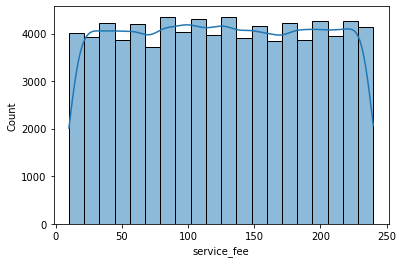

In [28]:
#Creating a categorical variable that splits the 'service_fee' colum into categories
sns.histplot(df['service_fee'], bins = 20, kde = True)

### 9. Hypothesis Exploration

##### If a rental has a higher rate of booking, than it should lead to an increased rate of reviews
##### If certain boroughs are more saught after by renters, then the demand would be higher and increase the price
##### If renters seek more private the accomodation, then the nightly price will be higher
##### If location is a desired amenity for host, than they will have listings in areas in demand

### 9. Export Data

In [29]:
#exporting data
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'NYC_cleaned_data_3.csv'))